In [1]:
import pandas as pd
import os 

In [2]:
cwd = os.getcwd()
datadir ='/'.join(cwd.split('/')[0:-1]) + '/Project/'
data_clean = pd.DataFrame(pd.read_csv(datadir + "Dataset_Clean_1106.csv"))

In [3]:
data_clean.corr()
#delete funny
data_clean.corr()[20:30].T>0.8
#compliment_profile & compliment_photos & compliment_list & compliment more
#compliment_cool & compliment_funny, compliment_plain, compliment_writer
#compliment more & compliment_writer, compliment_cute, compliment_profile
#friends_number, fans
#text_length, text_positive
data_clean.corr()[30:40].T>0.8
data_clean.corr()[40:50].T>0.8
#operatinghours, price_cost
#useful_review, funny review, cool_review

,count_food_detail,count_food_quality,Useful,operatinghours,useful_review,price_cost,traffic,queue_in_line,service,ambience
stars_review,False,False,False,False,False,False,False,False,False,False
funny_review,False,False,False,False,True,False,False,False,False,False
cool_review,False,False,False,False,True,False,False,False,False,False
is_open,False,False,False,False,False,False,False,False,False,False
review_count_business,False,False,False,False,False,False,False,False,False,False
stars_business,False,False,False,False,False,False,False,False,False,False
attributes.RestaurantsPriceRange2,False,False,False,False,False,False,False,False,False,False
review_count_user,False,False,False,False,False,False,False,False,False,False
average_stars_user,False,False,False,False,False,False,False,False,False,False
fans,False,False,False,False,False,False,False,False,False,False


In [4]:
data_no_correlation=data_clean.drop(['useful_user', 'funny_user', 'cool_user','compliment_profile', 'compliment_note',
                            'compliment_hot','compliment_more', 'compliment_list', 'compliment_cool', 'compliment_funny',
                            'compliment_plain', 'compliment_writer','compliment_cute','fans','funny_review','cool_review',
                            'elite_years','useful_review','compliment_photos'],axis=1)
len(data_no_correlation.columns)
#sort by time-related feature: date_review_to_now
data_no_correlation.sort_values(by='date_review_to_now')

,stars_review,is_open,review_count_business,stars_business,attributes.RestaurantsPriceRange2,review_count_user,average_stars_user,since_first_review,date_review_to_now,friends_number,...,Vietnamese,count_food_detail,count_food_quality,Useful,operatinghours,price_cost,traffic,queue_in_line,service,ambience
46503,4,1,596,4.0,3.0,4,4.50,1468,0,0,...,0,0,0,0,5.428571,0,0,0,0,0
82122,2,1,36,3.0,2.0,19,3.75,65,0,1,...,0,0,0,0,9.857143,0,0,0,0,0
62124,5,1,95,4.0,2.0,9,4.78,3457,0,135,...,0,2,0,0,7.714286,0,0,0,0,0
70748,5,1,586,4.0,2.0,5,5.00,3711,0,0,...,0,0,0,0,6.714286,0,0,1,1,0
47456,3,1,348,3.5,2.0,7,3.57,3684,0,355,...,0,0,0,0,5.714286,0,0,0,5,0
74864,4,1,287,4.0,3.0,106,3.44,2772,0,86,...,0,1,1,0,11.857143,1,0,0,0,3
76107,5,1,137,3.5,2.0,14,4.00,3489,0,21,...,0,1,0,0,3.857143,0,0,0,1,0
56808,5,1,998,4.0,2.0,4,3.75,1096,0,21,...,0,2,0,0,8.000000,0,0,0,0,0
27781,2,1,192,3.5,2.0,198,3.97,355,0,867,...,0,0,0,1,5.571429,0,0,1,2,0
199,5,1,235,4.0,2.0,921,4.23,2345,0,1049,...,0,2,0,1,11.000000,0,0,0,0,0


In [5]:
#normalization
from sklearn import preprocessing
normalize_list = []
for i in data_no_correlation.columns:
    if any(data_no_correlation[i]>1):
        normalize_list.append(i)
for feature in normalize_list:
    data_no_correlation[feature] = preprocessing.scale((data_no_correlation[feature]))
data_no_correlation

/Users/cyian/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,stars_review,is_open,review_count_business,stars_business,attributes.RestaurantsPriceRange2,review_count_user,average_stars_user,since_first_review,date_review_to_now,friends_number,...,Vietnamese,count_food_detail,count_food_quality,Useful,operatinghours,price_cost,traffic,queue_in_line,service,ambience
0,0.204022,1,-0.356503,0.374255,0.244153,-0.351763,0.295058,0.893876,0.869740,-0.425598,...,0,-0.447424,-0.224774,0,2.412133e-14,-0.196471,-0.063423,-0.416640,0.797582,-0.300865
1,0.204022,1,-0.356503,0.374255,0.244153,-0.205328,-0.596140,0.177164,1.830662,-0.504342,...,0,-0.447424,-0.224774,0,2.412133e-14,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865
2,0.966639,0,-0.477106,0.374255,1.740155,-0.205328,-0.596140,-0.851394,0.664253,-0.504342,...,0,-0.703726,-0.224774,0,-1.240761e+00,-0.196471,-0.063423,-0.416640,0.797582,-0.300865
3,0.204022,1,-0.356503,0.374255,0.244153,-0.061881,0.505706,1.578696,-0.048421,0.099082,...,0,0.834088,1.652425,1,2.412133e-14,-0.196471,-0.063423,-0.416640,2.084959,-0.300865
4,0.204022,1,-0.146018,0.374255,-1.251848,-0.061881,0.505706,1.658429,-0.144631,0.099082,...,0,0.065181,-0.224774,1,4.016638e-01,-0.196471,-0.063423,-0.416640,-0.489796,2.232244
5,0.204022,1,0.005304,-0.460853,0.244153,-0.061881,0.505706,-0.848736,-0.474837,0.099082,...,0,1.090390,-0.224774,1,3.955433e-02,-0.196471,-0.063423,1.315289,3.372337,-0.300865
6,0.204022,1,-0.428182,1.209364,0.244153,-0.061881,0.505706,-1.121601,-1.031910,0.099082,...,0,2.115599,1.652425,1,6.603134e-01,-0.196471,-0.063423,-0.416640,3.372337,-0.300865
7,0.204022,1,0.191897,0.374255,0.244153,-0.061881,0.505706,-0.144427,-0.782474,0.099082,...,0,1.346692,3.529624,1,-7.363945e-01,-0.196471,-0.063423,1.315289,2.084959,-0.300865
8,0.966639,1,-0.134640,1.209364,-1.251848,-0.061881,0.505706,-1.184502,-0.509283,0.099082,...,0,0.834088,9.161221,1,-9.303817e-01,4.230238,-0.063423,-0.416640,3.372337,-0.300865
9,0.204022,1,1.122584,1.209364,0.244153,-0.061881,0.505706,0.799083,-1.125745,0.099082,...,0,0.834088,1.652425,1,-2.288292e+00,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865


In [6]:
from sklearn import cross_validation
#train-test split
train, test = cross_validation.train_test_split(data_no_correlation, test_size=0.2, random_state=42)

/Users/cyian/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
train

,stars_review,is_open,review_count_business,stars_business,attributes.RestaurantsPriceRange2,review_count_user,average_stars_user,since_first_review,date_review_to_now,friends_number,...,Vietnamese,count_food_detail,count_food_quality,Useful,operatinghours,price_cost,traffic,queue_in_line,service,ambience
65520,-1.321211,1,-0.331473,0.374255,0.244153,-0.513140,-2.605389,-0.869999,-0.978459,-0.507766,...,0,-0.703726,-0.224774,0,-3.872175e-01,-0.196471,-0.063423,-0.416640,0.797582,2.232244
79834,0.966639,0,-0.533994,1.209364,-1.251848,-0.514634,-0.612344,-1.134004,-0.242030,-0.512902,...,0,-0.703726,-0.224774,0,4.469275e-01,-0.196471,-0.063423,-0.416640,2.084959,4.765353
70345,0.204022,1,-0.264345,0.374255,0.244153,-0.496704,0.829778,1.404169,-0.575799,-0.512902,...,0,-0.703726,-0.224774,0,4.663262e-01,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865
75099,-0.558595,1,-0.407703,0.374255,0.244153,-0.513140,0.084411,-0.277315,-1.210078,-0.507766,...,0,-0.703726,-0.224774,0,9.318955e-01,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865
51576,0.966639,1,0.109978,0.374255,1.740155,-0.495209,-0.207254,2.017228,-0.907192,-0.512046,...,0,-0.703726,-0.224774,0,5.051236e-01,-0.196471,-0.063423,-0.416640,0.797582,-0.300865
56315,-2.083828,1,-0.548785,-2.966179,-1.251848,-0.496704,0.084411,-0.784950,0.926754,-0.506054,...,0,-0.447424,-0.224774,1,8.543006e-01,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865
59484,-0.558595,1,-0.383810,-0.460853,-1.251848,0.057658,0.084411,1.497191,-0.985586,0.228326,...,0,-0.191121,-0.224774,1,2.173414e+00,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865
32373,0.966639,0,-0.168773,0.374255,0.244153,-0.055904,0.116819,-0.770775,-0.453457,-0.013044,...,0,-0.703726,-0.224774,1,8.543006e-01,-0.196471,-0.063423,1.315289,0.797582,-0.300865
532,-0.558595,1,-0.510101,-0.460853,-1.251848,0.644892,0.019597,0.019469,-0.626874,1.001223,...,0,4.678622,-0.224774,1,2.412133e-14,-0.196471,-0.063423,1.315289,-0.489796,-0.300865
16521,0.204022,1,-0.395187,1.209364,-1.251848,0.259379,0.586724,-1.185388,-0.838300,-0.142288,...,0,0.834088,3.529624,1,5.827185e-01,-0.196471,-0.063423,3.047218,-0.489796,-0.300865


In [8]:
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
auc_list = []
importance_list = []
accuracy_list = []
y = data_no_correlation['Useful']
x = data_no_correlation.drop('Useful', axis = 1)
kf = cross_validation.KFold(len(train), n_folds = 10, shuffle=True, random_state=7)
for train_idx, validation_idx in kf:
    x_train = x.iloc[train_idx]
    y_train = y.iloc[train_idx]
    x_validation = x.iloc[validation_idx]
    y_validation = y.iloc[validation_idx]
    clf = ensemble.RandomForestClassifier(n_estimators = 10)
    clf.fit(x_train, y_train)
    clf_pred = clf.predict_proba(x_validation)[:,1]
    auc = roc_auc_score(y_validation, clf_pred)
    auc_list.append(auc)
    importance = clf.feature_importances_
    importance_list.append(importance)
    y_pred = clf.predict(x_validation)
    accuracy_list.append(accuracy_score(y_validation, y_pred))

In [9]:
accuracy_list

[0.87854556427278219,
 0.87779118889559449,
 0.87462281231140615,
 0.87024743512371761,
 0.87356668678334337,
 0.87401931200965599,
 0.87809293904646957,
 0.86811528595141085,
 0.86871887732005437,
 0.87958352195563605]

In [10]:
auc_list

[0.93957660377589347,
 0.94020238914174858,
 0.9400088199890605,
 0.93591009141278558,
 0.93794020586929527,
 0.93847034787956751,
 0.9399128096343683,
 0.93663378014702969,
 0.93750804606618909,
 0.94506394291945184]

In [11]:
# for (a,b) in zip (x.columns, importance_list[0]):
#     print(a, b)
dic = {} 
for idx in range(len(x.columns)):
    dic[x.columns[idx]] = importance_list[0][idx]
sorted(dic.items(), key=lambda x: x[1], reverse=True)

[('friends_number', 0.25391058172399844),
 ('text_length', 0.17036623900407558),
 ('review_count_user', 0.13213939922392334),
 ('text_positive', 0.064479457273895105),
 ('since_first_review', 0.04890656465554679),
 ('average_stars_user', 0.044646955726010559),
 ('review_count_business', 0.042032499402520365),
 ('user_yelping_to_now', 0.041272564455078084),
 ('date_review_to_now', 0.038619523351622526),
 ('text_negative', 0.031806331634547047),
 ('stars_review', 0.02532712982268398),
 ('operatinghours', 0.024539279177999709),
 ('count_food_detail', 0.016472304239736259),
 ('stars_business', 0.013690281486080643),
 ('attributes.RestaurantsPriceRange2', 0.0081708490448299323),
 ('service', 0.0068749521937835944),
 ('queue_in_line', 0.0050081911821674326),
 ('American', 0.0047659287742368873),
 ('count_food_quality', 0.004223336703456107),
 ('is_open', 0.0041250298481635365),
 ('Italian', 0.0035705120341775814),
 ('Mexican', 0.0028233908493450902),
 ('ambience', 0.0028145446964543946),
 ('

In [12]:
data_no_correlation.columns

Index(['stars_review', 'is_open', 'review_count_business', 'stars_business',
       'attributes.RestaurantsPriceRange2', 'review_count_user',
       'average_stars_user', 'since_first_review', 'date_review_to_now',
       'friends_number', 'text_length', 'text_positive', 'text_negative',
       'user_yelping_to_now', 'Chinese', 'Mexican', 'American', 'Korean',
       'Italian', 'Japanese', 'Thai', 'Vietnamese', 'count_food_detail',
       'count_food_quality', 'Useful', 'operatinghours', 'price_cost',
       'traffic', 'queue_in_line', 'service', 'ambience'],
      dtype='object')

In [13]:
x_nested = data_no_correlation[['user_yelping_to_now', 'friends_number', 'text_length', 'text_negative', 'review_count_user']]

In [14]:
x_nested_train, x_nested_test, y_nested_train, y_nested_test = cross_validation.train_test_split(x_nested, y, test_size = 0.2)

In [15]:
#split the train dataset to test and validation
auc_list_nested = []
importance_list_nested = []
accuracy_list_nested = []
kf_nested = cross_validation.KFold(len(x_nested_train), n_folds = 10, shuffle=True, random_state=7)
for train_idx, validation_idx in kf_nested:
    x_train = x_nested_train.iloc[train_idx]
    y_train = y_nested_train.iloc[train_idx]
    x_validation = x_nested_train.iloc[validation_idx]
    y_validation = y_nested_train.iloc[validation_idx]
    clf = ensemble.RandomForestClassifier(n_estimators = 10)
    clf.fit(x_train, y_train)
    clf_pred = clf.predict_proba(x_validation)[:,1]
    auc = roc_auc_score(y_validation, clf_pred)
    auc_list_nested.append(auc)
    importance = clf.feature_importances_
    importance_list_nested.append(importance)
    y_pred = clf.predict(x_validation)
    accuracy_list_nested.append(accuracy_score(y_validation, y_pred))

In [16]:
auc_list_nested

[0.9274908224183942,
 0.92797388171031192,
 0.93387583190840151,
 0.92655604021604354,
 0.92935165032079858,
 0.92664197924770741,
 0.92560746910860559,
 0.92228354900679954,
 0.92632171690675524,
 0.93231226367473585]

In [17]:
importance_list_nested

[array([ 0.11470953,  0.42628351,  0.21874278,  0.05693348,  0.18333069]),
 array([ 0.11006015,  0.46034007,  0.23203828,  0.0416027 ,  0.1559588 ]),
 array([ 0.11052198,  0.35245273,  0.18602864,  0.08994866,  0.26104799]),
 array([ 0.1071187 ,  0.35448614,  0.25407376,  0.04529687,  0.23902453]),
 array([ 0.10618761,  0.39665067,  0.22861776,  0.05583539,  0.21270857]),
 array([ 0.10887396,  0.30490937,  0.23859864,  0.06496355,  0.28265449]),
 array([ 0.11517071,  0.32560926,  0.29016291,  0.05012754,  0.21892958]),
 array([ 0.10510641,  0.33697247,  0.16965867,  0.06467661,  0.32358584]),
 array([ 0.10777177,  0.33360375,  0.17902983,  0.04877123,  0.33082342]),
 array([ 0.11194947,  0.40740973,  0.26847086,  0.0555226 ,  0.15664733])]

In [18]:
for (a,b) in zip (x_nested_train.columns, importance_list_nested[0]):
    print(a, b)

user_yelping_to_now 0.114709533452
friends_number 0.42628351161
text_length 0.218742780726
text_negative 0.0569334812679
review_count_user 0.183330692944


In [19]:
accuracy_list_nested

[0.87085093542546776,
 0.86632468316234157,
 0.87326493663246829,
 0.86632468316234157,
 0.86587205793602895,
 0.86632468316234157,
 0.86360893180446585,
 0.86630451184548063,
 0.87007695789950201,
 0.87626376942809714]

The implicit goal of AUC is to deal with situations where you have a very skewed sample distribution, and don't want to overfit to a single class

In [20]:
import pandas as pd
from sklearn import cross_validation

In [21]:
data_divided = pd.read_csv('data_clean_divide.csv')

In [22]:
data_divided.head(5)

,stars_review,funny_review,cool_review,is_open,review_count_business,stars_business,attributes.RestaurantsPriceRange2,review_count_user,average_stars_user,fans,...,count_food_detail,count_food_quality,Useful,operatinghours,useful_review,price_cost,traffic,queue_in_line,service,ambience
0,4,0,0,1,182,4.0,2.0,114,3.96,12,...,1,0,0,8.854356,1,0,0,0,1,0
1,4,1,1,1,182,4.0,2.0,212,3.41,10,...,1,0,0,8.854356,1,0,0,0,0,0
2,5,0,0,0,76,4.0,3.0,212,3.41,10,...,0,0,0,4.285714,0,0,0,0,1,0
3,4,6,8,1,182,4.0,2.0,308,4.09,135,...,6,1,0,8.854356,9,0,0,0,2,0
4,4,7,7,1,367,4.0,1.0,308,4.09,135,...,3,0,0,10.333333,12,0,0,0,0,1


In [23]:
#normalization
from sklearn import preprocessing
normalize_list_divided = []
for i in data_divided.columns:
    if any(data_divided[i]>1):
        normalize_list_divided.append(i)
for feature in normalize_list_divided:
    data_divided[feature] = preprocessing.scale((data_divided[feature]))

/Users/cyian/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [24]:
x_divided = data_divided.drop(['useful_user', 'funny_user', 'cool_user','compliment_profile', 'compliment_note',
                            'compliment_hot','compliment_more', 'compliment_list', 'compliment_cool', 'compliment_funny',
                            'compliment_plain', 'compliment_writer','compliment_cute','fans','funny_review','cool_review',
                            'elite_years','useful_review','date_review_to_now', 'Useful','compliment_photos','user_yelping_to_now'], axis = 1)
y_divided = data_divided['Useful']

In [25]:
x_divided.columns

Index(['stars_review', 'is_open', 'review_count_business', 'stars_business',
       'attributes.RestaurantsPriceRange2', 'review_count_user',
       'average_stars_user', 'since_first_review', 'friends_number',
       'text_length', 'text_positive', 'text_negative', 'Chinese', 'Mexican',
       'American', 'Korean', 'Italian', 'Japanese', 'Thai', 'Vietnamese',
       'count_food_detail', 'count_food_quality', 'operatinghours',
       'price_cost', 'traffic', 'queue_in_line', 'service', 'ambience'],
      dtype='object')

In [26]:
x_divided_train, x_divided_test, y_divided_train, y_divided_test = cross_validation.train_test_split(x_divided, y_divided, test_size = 0.2)

In [27]:
auc_list_divided = []
importance_list_divided = []
accuracy_list_divided = []
kf_divided = cross_validation.KFold(len(x_divided_train), n_folds = 10, shuffle=True, random_state=7)
for train_idx, validation_idx in kf_divided:
    x_train = x_divided_train.iloc[train_idx]
    y_train = y_divided_train.iloc[train_idx]
    x_validation = x_divided_train.iloc[validation_idx]
    y_validation = y_divided_train.iloc[validation_idx]
    clf = ensemble.RandomForestClassifier()
    clf.fit(x_train, y_train)
    clf_pred = clf.predict_proba(x_validation)[:,1]
    auc = roc_auc_score(y_validation, clf_pred)
    auc_list_divided.append(auc)
    importance = clf.feature_importances_
    importance_list_divided.append(importance)
    y_pred = clf.predict(x_validation)
    accuracy_list_divided.append(accuracy_score(y_validation, y_pred))

In [28]:
accuracy_list_divided

[0.8337356668678334,
 0.82981291490645748,
 0.83267954133977062,
 0.83464091732045864,
 0.82966203983101994,
 0.82604103802051898,
 0.81744115872057932,
 0.82812735777878377,
 0.82194054625018864,
 0.83567224988682665]

In [29]:
import numpy as np
auc_list_divided
np.mean(auc_list_divided)

0.82077635431728524

In [30]:
importance_list_divided[0]

array([ 0.02176889,  0.01940088,  0.07922625,  0.03469331,  0.01717502,
        0.12845977,  0.07610225,  0.10417082,  0.14392119,  0.09216153,
        0.06109356,  0.0350964 ,  0.00375923,  0.00621339,  0.01063816,
        0.00271029,  0.00647368,  0.00516077,  0.00211089,  0.00209937,
        0.04030133,  0.00810828,  0.05776006,  0.00481727,  0.00124115,
        0.01309578,  0.01451202,  0.00772845])

In [31]:
dic_divided = {} 
for idx in range(len(x_divided.columns)):
    dic_divided[x_divided.columns[idx]] = importance_list_divided[0][idx]
sorted(dic_divided.items(), key=lambda x: x[1], reverse=True)

[('friends_number', 0.14392119079477797),
 ('review_count_user', 0.1284597716566323),
 ('since_first_review', 0.10417082334923629),
 ('text_length', 0.092161530735364247),
 ('review_count_business', 0.079226251831167244),
 ('average_stars_user', 0.076102248647509835),
 ('text_positive', 0.061093562197649998),
 ('operatinghours', 0.057760055848881518),
 ('count_food_detail', 0.040301331908726847),
 ('text_negative', 0.035096399331400761),
 ('stars_business', 0.034693308895056493),
 ('stars_review', 0.021768891532146336),
 ('is_open', 0.01940087996488446),
 ('attributes.RestaurantsPriceRange2', 0.017175022344430576),
 ('service', 0.01451202232423617),
 ('queue_in_line', 0.013095777622644847),
 ('American', 0.010638156094425966),
 ('count_food_quality', 0.0081082760341928788),
 ('ambience', 0.0077284522280028703),
 ('Italian', 0.0064736839036994061),
 ('Mexican', 0.0062133894767511192),
 ('Japanese', 0.0051607732412548967),
 ('price_cost', 0.0048172748070890517),
 ('Chinese', 0.0037592268

In [32]:
x_divided_nested = data_divided[['friends_number','review_count_user','review_count_business','since_first_review','text_length']]

In [33]:
x_divided_nested_train, x_divided_nested_test, y_divided_nested_train, y_divided_nested_test = cross_validation.train_test_split(x_divided_nested, y_divided, test_size = 0.2)

In [34]:
auc_list_divided_nested = []
importance_list_divided_nested = []
accuracy_list_divided_nested = []
kf_divided = cross_validation.KFold(len(x_divided_nested_train), n_folds = 10, shuffle=True, random_state=7)
for train_idx, validation_idx in kf_divided:
    x_train = x_divided_nested_train.iloc[train_idx]
    y_train = y_divided_nested_train.iloc[train_idx]
    x_validation = x_divided_nested_train.iloc[validation_idx]
    y_validation = y_divided_nested_train.iloc[validation_idx]
    clf = ensemble.RandomForestClassifier()
    clf.fit(x_train, y_train)
    clf_pred = clf.predict_proba(x_validation)[:,1]
    auc = roc_auc_score(y_validation, clf_pred)
    auc_list_divided_nested.append(auc)
    importance = clf.feature_importances_
    importance_list_divided_nested.append(importance)
    y_pred = clf.predict(x_validation)
    accuracy_list_divided_nested.append(accuracy_score(y_validation, y_pred))

In [35]:
auc_list_divided_nested
np.mean(auc_list_divided_nested)

0.8174371117361886

In [36]:
#improved model- tunning parameters
minsample = [5, 25, 50, 75, 100, 200]

In [37]:
import numpy as np
auc_list_divided_nested_tune = []
# importance_list_divided_nested_tune = []
# accuracy_list_divided_nested_tune = []
kf_divided = cross_validation.KFold(len(x_divided_nested_train), n_folds = 10, shuffle=True, random_state=7)
for idx in minsample:
    auc_tune = []
    for train_idx, validation_idx in kf_divided:
        x_train = x_divided_nested_train.iloc[train_idx]
        y_train = y_divided_nested_train.iloc[train_idx]
        x_validation = x_divided_nested_train.iloc[validation_idx]
        y_validation = y_divided_nested_train.iloc[validation_idx]
        clf = ensemble.RandomForestClassifier(min_samples_leaf=idx)
        clf.fit(x_train, y_train)
        clf_pred = clf.predict_proba(x_validation)[:,1]
        auc = roc_auc_score(y_validation, clf_pred)
        auc_tune.append(auc)
#         importance = clf.feature_importances_
#         importance_list_divided_nested.append(importance)
#         y_pred = clf.predict(x_validation)
#         accuracy_list_divided_nested.append(accuracy_score(y_validation, y_pred))
    auc_list_divided_nested_tune.append(np.mean(auc_tune))

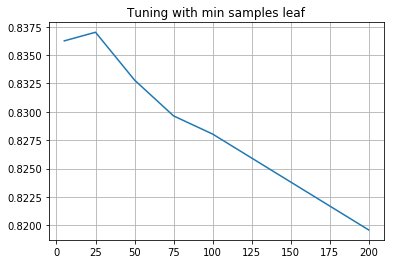

In [63]:
import matplotlib.pyplot as plt
plt.plot(minsample, auc_list_divided_nested_tune)
plt.title('Tuning with min samples leaf')
plt.grid()
plt.show()
#seen from the plot that the tunning parameter of min_samples_leaf should be 25. 

In [43]:
n_est = [10, 15, 30, 40, 50, 100]

In [44]:
import timeit
auc_list_divided_nested_est = []
# importance_list_divided_nested_tune = []
# accuracy_list_divided_nested_tune = []
kf_divided = cross_validation.KFold(len(x_divided_nested_train), n_folds = 10, shuffle=True, random_state=7)
for idx in n_est:
    auc_tune = []
    for train_idx, validation_idx in kf_divided:
        x_train = x_divided_nested_train.iloc[train_idx]
        y_train = y_divided_nested_train.iloc[train_idx]
        x_validation = x_divided_nested_train.iloc[validation_idx]
        y_validation = y_divided_nested_train.iloc[validation_idx]
        clf = ensemble.RandomForestClassifier(min_samples_leaf=25, n_estimators=idx)
        clf.fit(x_train, y_train)
        clf_pred = clf.predict_proba(x_validation)[:,1]
        auc = roc_auc_score(y_validation, clf_pred)
        auc_tune.append(auc)
#         importance = clf.feature_importances_
#         importance_list_divided_nested.append(importance)
#         y_pred = clf.predict(x_validation)
#         accuracy_list_divided_nested.append(accuracy_score(y_validation, y_pred))
    auc_list_divided_nested_est.append(np.mean(auc_tune))
    #print('The time to run this model %s is: %s' %(str(idx), str(timeit)))

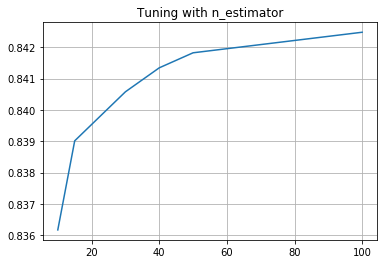

In [45]:
plt.plot(n_est, auc_list_divided_nested_est)
plt.title('Tuning with n_estimator')
plt.grid()
plt.show()
#The time to run the complex model takes longer, while the auc doesn't improve much. Set the n_estimator to 30 since 
#it seen from the plot that has the best marginal auc

In [48]:
samplesplit = [2, 5, 10, 25, 50, 75, 100, 150]

In [49]:
auc_list_divided_nested_est3 = []
# importance_list_divided_nested_tune = []
# accuracy_list_divided_nested_tune = []
kf_divided = cross_validation.KFold(len(x_divided_nested_train), n_folds = 10, shuffle=True, random_state=7)
for idx in samplesplit:
    auc_tune = []
    for train_idx, validation_idx in kf_divided:
        x_train = x_divided_nested_train.iloc[train_idx]
        y_train = y_divided_nested_train.iloc[train_idx]
        x_validation = x_divided_nested_train.iloc[validation_idx]
        y_validation = y_divided_nested_train.iloc[validation_idx]
        clf = ensemble.RandomForestClassifier(min_samples_leaf=25, n_estimators=30, min_samples_split=idx)
        clf.fit(x_train, y_train)
        clf_pred = clf.predict_proba(x_validation)[:,1]
        auc = roc_auc_score(y_validation, clf_pred)
        auc_tune.append(auc)
#         importance = clf.feature_importances_
#         importance_list_divided_nested.append(importance)
#         y_pred = clf.predict(x_validation)
#         accuracy_list_divided_nested.append(accuracy_score(y_validation, y_pred))
    auc_list_divided_nested_est3.append(np.mean(auc_tune))

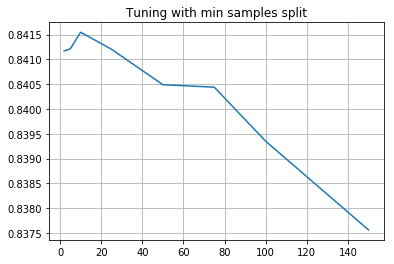

In [64]:
plt.plot(samplesplit, auc_list_divided_nested_est3)
plt.title('Tuning with min samples split')
plt.grid()
plt.show()

In [51]:
#min_samples_split = 10
#final auc
auc_list_divided_nested_est3[2]

0.84154784370071278

In [52]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn import ensemble
xtrain, xtest, ytrain, ytest = train_test_split(x_divided_nested_train, y_divided_nested_train, test_size = 0.2)
finalclf = ensemble.RandomForestClassifier(min_samples_leaf=25, n_estimators=30, min_samples_split=10)
finalclf.fit(xtrain, ytrain)
ypred = finalclf.predict(xtest)
df_confusion = pd.crosstab(ytest, ypred)


In [53]:
finalclf.feature_importances_

array([ 0.40354491,  0.21496989,  0.07762829,  0.14595803,  0.15789889])

In [54]:
for (a,b) in zip (x_divided_nested.columns, finalclf.feature_importances_):
    print(a, b)

friends_number 0.403544906552
review_count_user 0.2149698896
review_count_business 0.0776282869392
since_first_review 0.145958029635
text_length 0.157898887274


In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

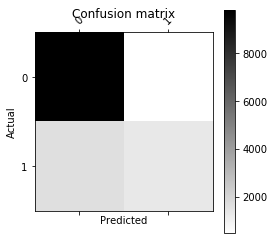

In [57]:
plot_confusion_matrix(df_confusion)

In [58]:
df_confusion

col_0,0,1
Useful,,
0,9797,470
1,1654,1335


In [59]:
tn, fp, fn, tp = metrics.confusion_matrix(ytest, ypred).ravel()

In [60]:
true_positive_rate = tp/(tp+fn)
false_positive_rate = fp/(fp+tn)
true_negative_rate = tn/(fp+tn)
false_negative_rate = fn/(fn+tp)

In [61]:
raw_data = {'true positive rate': [true_positive_rate], 'false positive rate': [false_positive_rate], 
            'true negative rate': [true_negative_rate], 'false negative rate': [false_negative_rate] }
pd.DataFrame(raw_data, columns=['true positive rate','false positive rate', 'true negative rate','false negative rate'])

,true positive rate,false positive rate,true negative rate,false negative rate
0,0.446638,0.045778,0.954222,0.553362


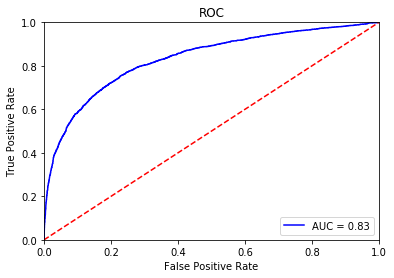

In [62]:
probs = finalclf.predict_proba(xtest)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(ytest, probs)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()